In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [97]:
pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [98]:
import torch
print(torch.__version__)


2.5.1


In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
%matplotlib inline

In [101]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [102]:
file_path = '/Users/shivamverma/Downloads/reviews_data.csv'


In [103]:
url = "https://w7.pngwing.com/pngs/708/311/png-transparent-icon-logo-twitter-logo-twitter-logo-blue-social-media-area-thumbnail.png"


In [104]:
response = requests.get(url)


In [105]:
df.head()

,label,text
0,0,Amber and LaDonna at the Starbucks on Southwes...
1,0,** at the Starbucks by the fire station on 436...
2,0,I just wanted to go out of my way to recognize...
3,0,Me and my friend were at Starbucks and my card...
4,0,I’m on this kick of drinking 5 cups of warm wa...


In [106]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [107]:
mask=np.array(Image.open("/Users/shivamverma/Downloads/mask-star.png"))

In [108]:
df.shape

(850, 2)

In [109]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [112]:
print(df.columns)

Index(['label', 'text'], dtype='object')


In [111]:

mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

KeyError: 'Rating'

In [93]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [33]:
df["Rating"]=df["Rating"].astype(int)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_47405/796869934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Rating",data=df,palette="cool")


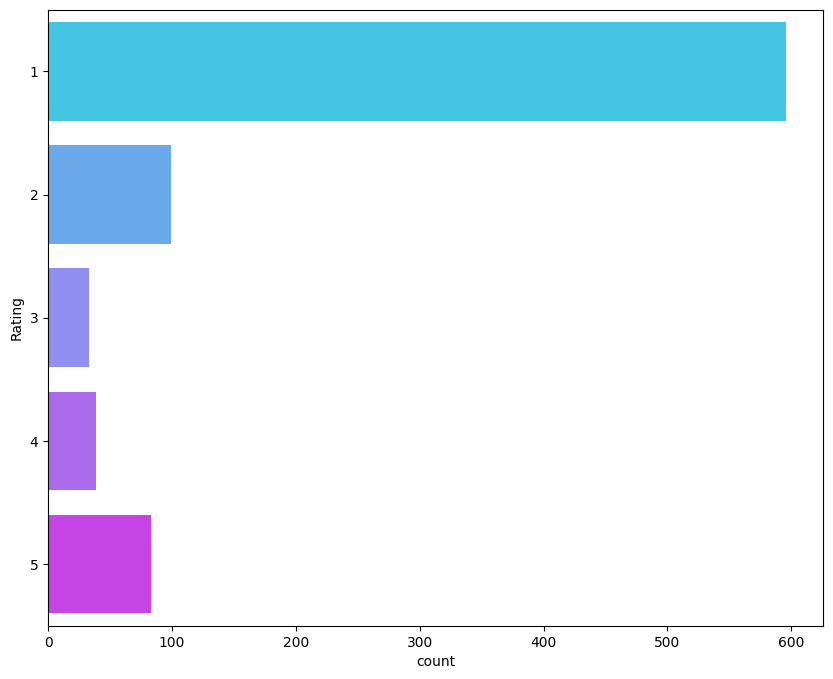

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(y="Rating",data=df,palette="cool")
plt.show()


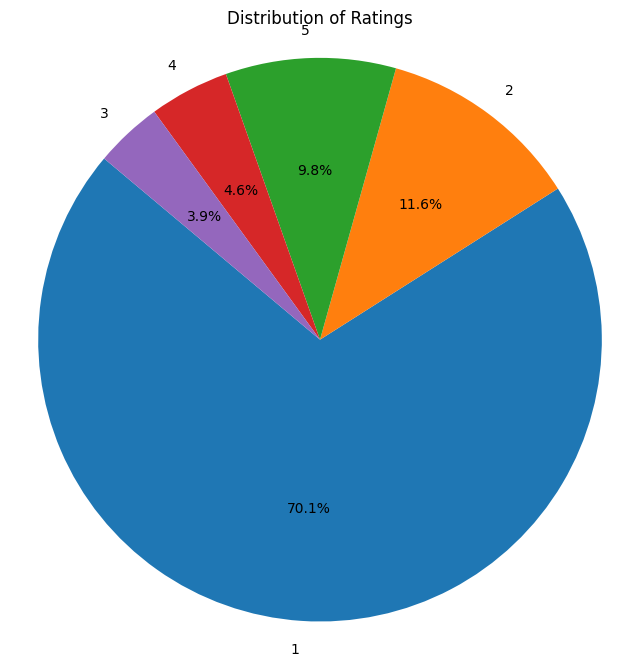

In [36]:
rating_counts = df["Rating"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

In [37]:
df["location"].value_counts()

location
New York, NY       14
Los Angeles, CA    12
Seattle, WA        11
Chicago, IL         9
Las Vegas, NV       8
                   ..
Chantilly, VA       1
St. John's, NL      1
Lorton, VA          1
Anaheim, CA         1
Ramsey, NJ          1
Name: count, Length: 633, dtype: int64

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_47405/1046134336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="location",data=df[:50],palette="cool")


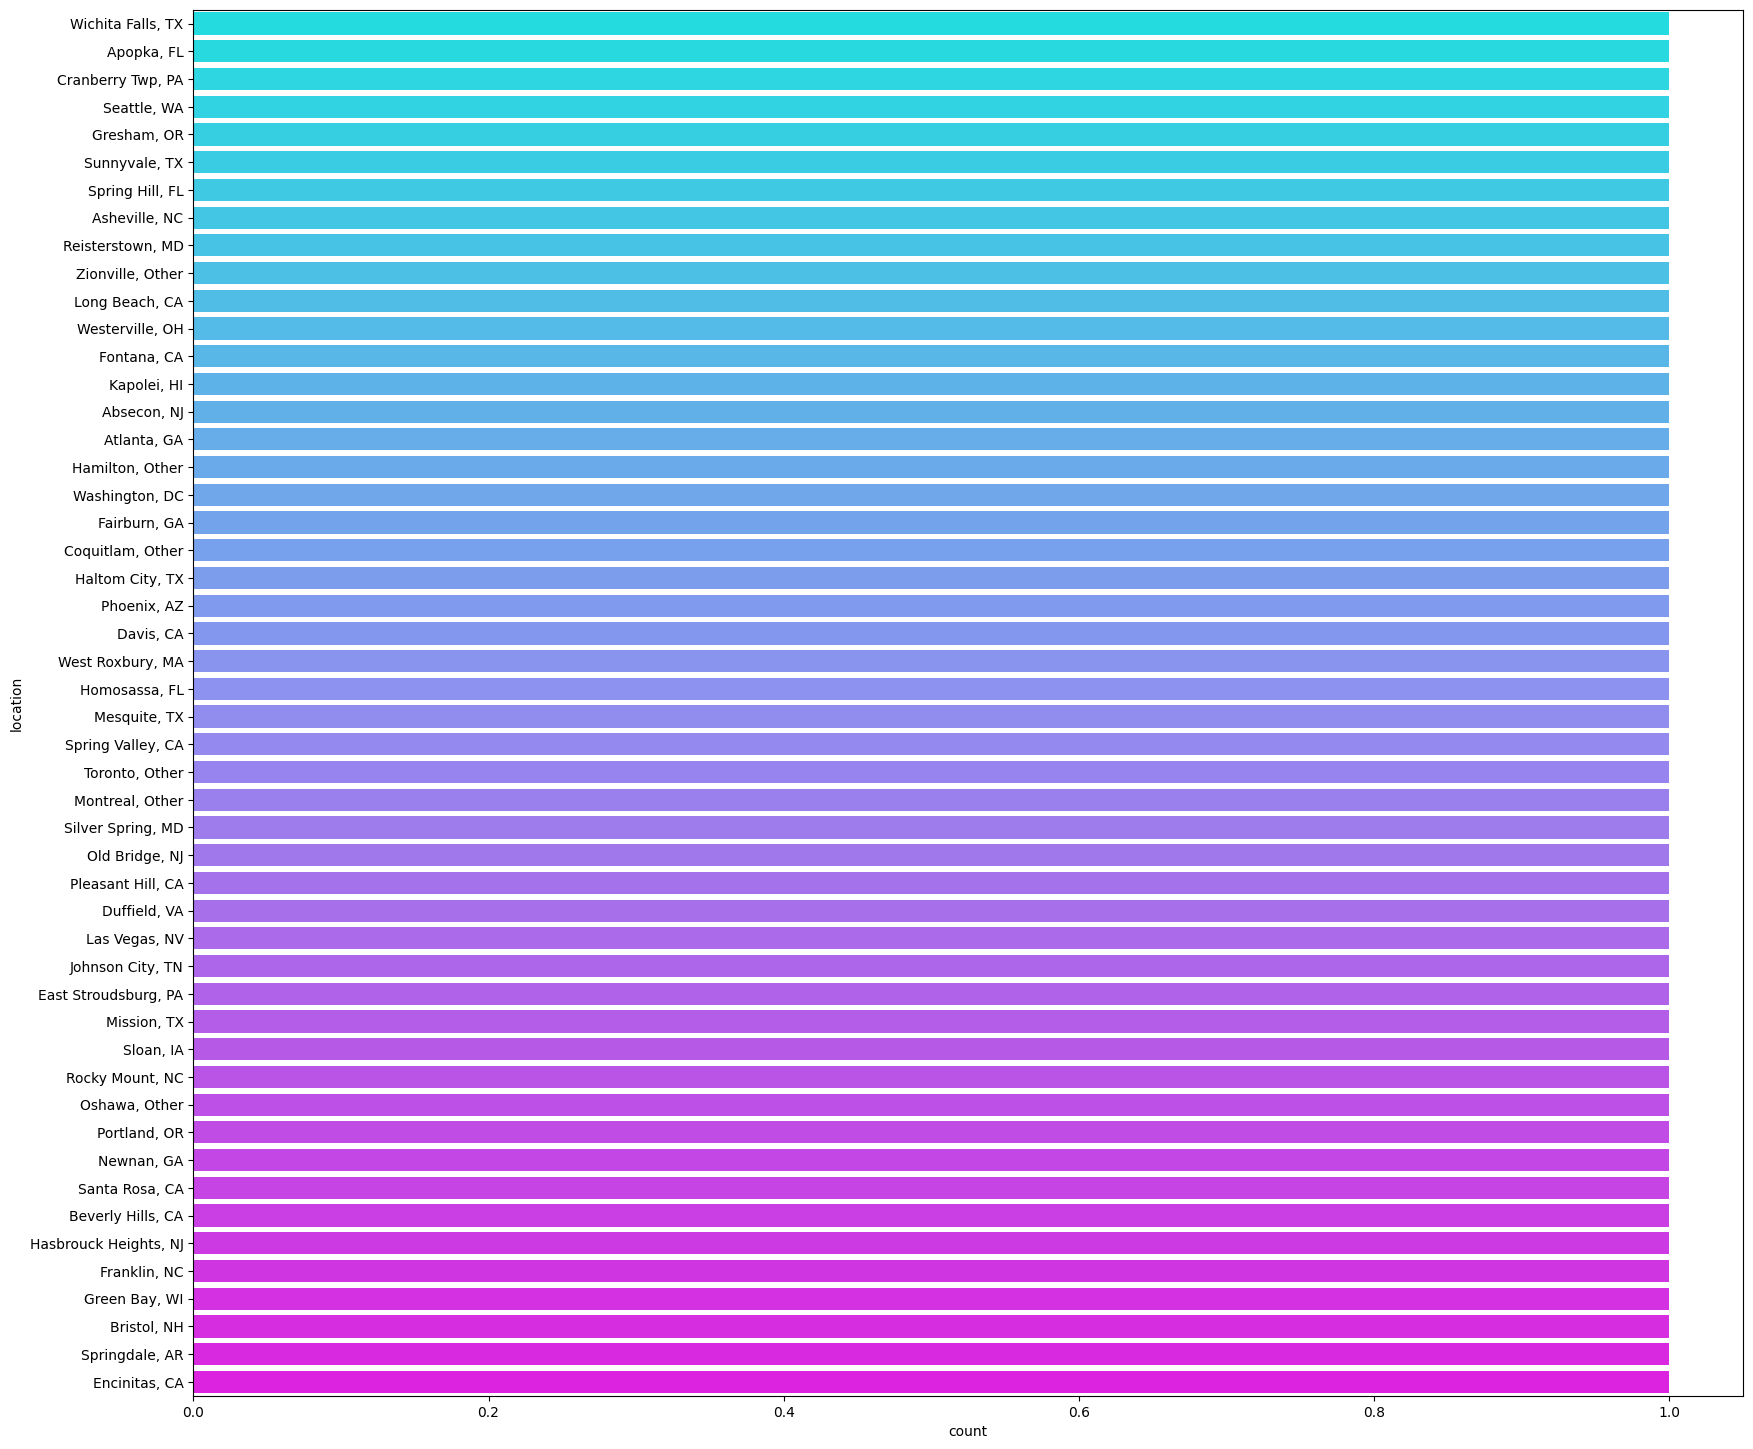

In [38]:
plt.figure(figsize=(20,18))
sns.countplot(y="location",data=df[:50],palette="cool")
plt.show()

In [39]:
df.drop(columns=["name","location","Date","Image_Links"],axis=1,inplace=True)

In [40]:
df.head()

,Rating,Review
0,5,Amber and LaDonna at the Starbucks on Southwes...
1,5,** at the Starbucks by the fire station on 436...
2,5,I just wanted to go out of my way to recognize...
3,5,Me and my friend were at Starbucks and my card...
4,5,I’m on this kick of drinking 5 cups of warm wa...


In [41]:
def map_sentiment(score):
    if score in [1, 2]:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    elif score in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  
df['Rating'] = df.Rating.apply(map_sentiment)

In [42]:
df.rename(columns={"Rating":"label"},inplace=True)
df.rename(columns={"Review":"text"},inplace=True)

In [43]:
df["label"].value_counts()

label
Negative    695
Positive    122
Neutral      33
Name: count, dtype: int64

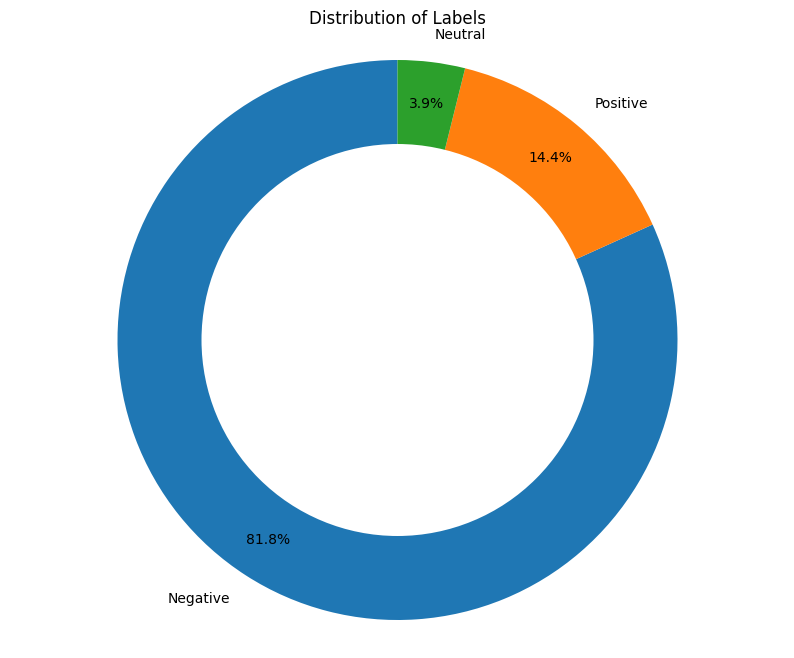

In [44]:
label_counts = df["label"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribution of Labels')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.axis('equal')
plt.show()

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_47405/3946246094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label",data=df,palette="hot")


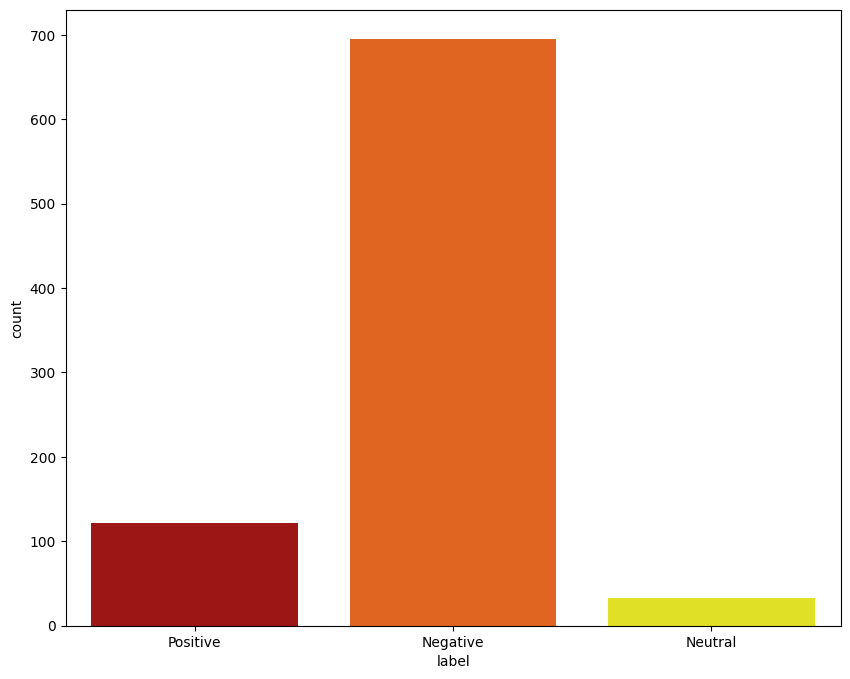

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(x="label",data=df,palette="hot")
plt.show()

Negative Wordcloud

In [73]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,15))
negative_wordcloud=df[df["label"]=="Negative"]
negative_text=" ".join(negative_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="spring",mask=mask).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 1500x1500 with 0 Axes>

30 Most Common Words From Negative Text

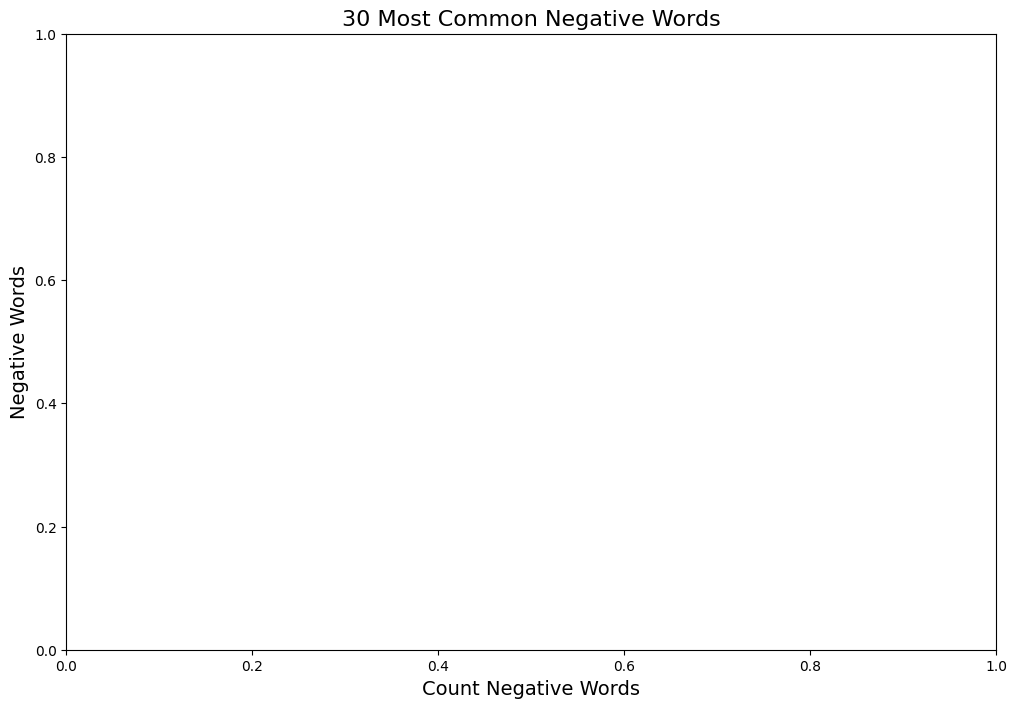

In [74]:
from collections import Counter

# Process text and count words
negative_text = df[df["label"] == "Negative"]
data_set = negative_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)

# Create DataFrame
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot with reversed red palette
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words, palette="Reds_r")
plt.title('30 Most Common Negative Words', fontsize=16)
plt.xlabel('Count Negative Words', fontsize=14)
plt.ylabel('Negative Words', fontsize=14)
plt.show()


Positive Wordcloud¶

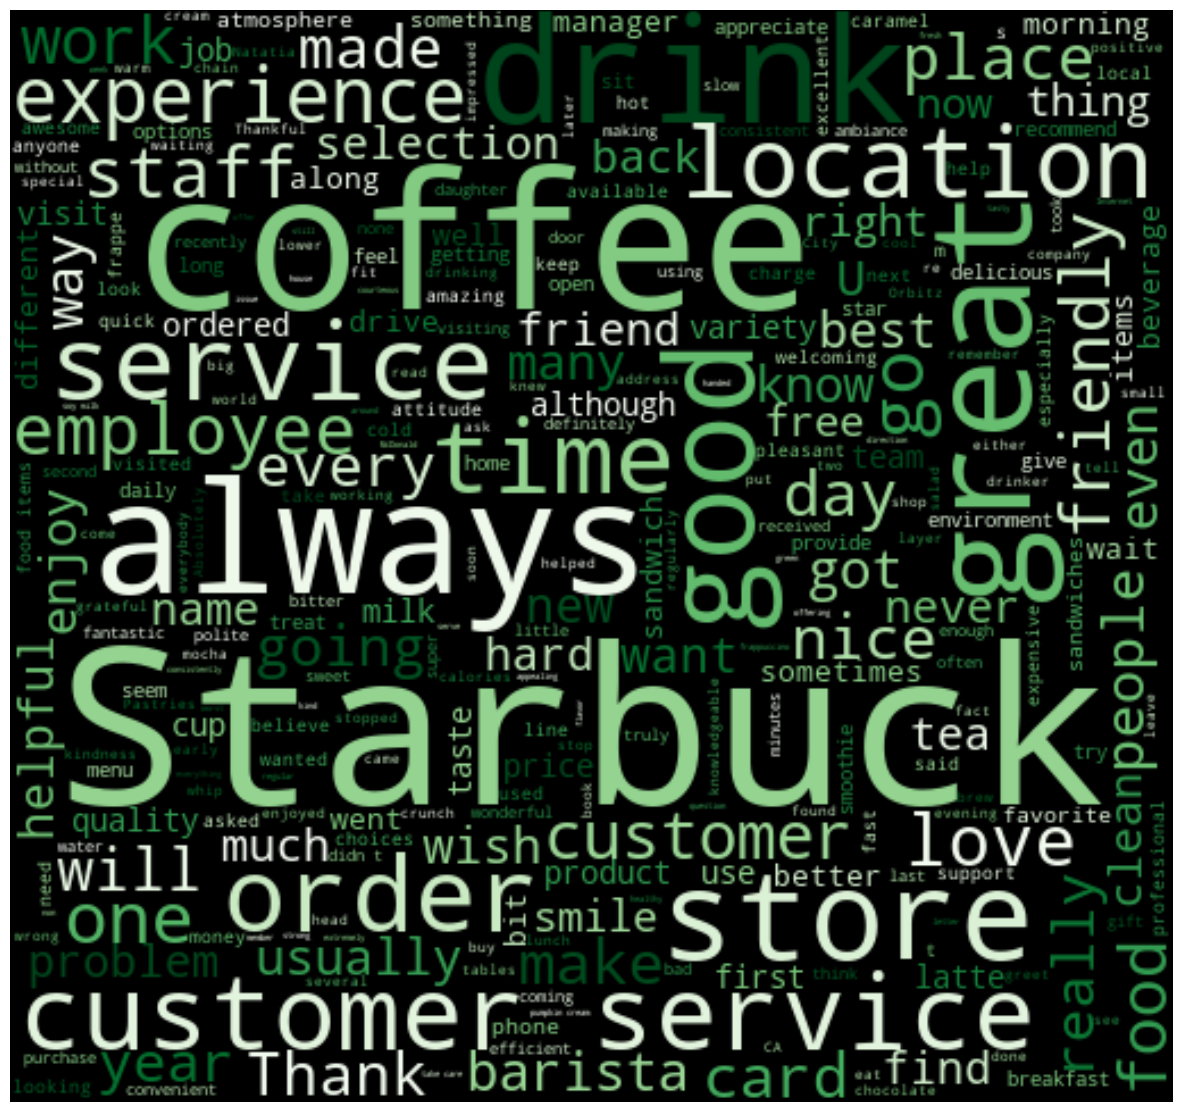

In [50]:
plt.figure(figsize=(15,15))
positive_wordcloud=df[df["label"]=="Positive"]
positive_text=" ".join(positive_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Greens",mask=mask).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

30 Most Common Words From Positive Text¶

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_47405/2619160748.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_common_words, palette="Greens_r")


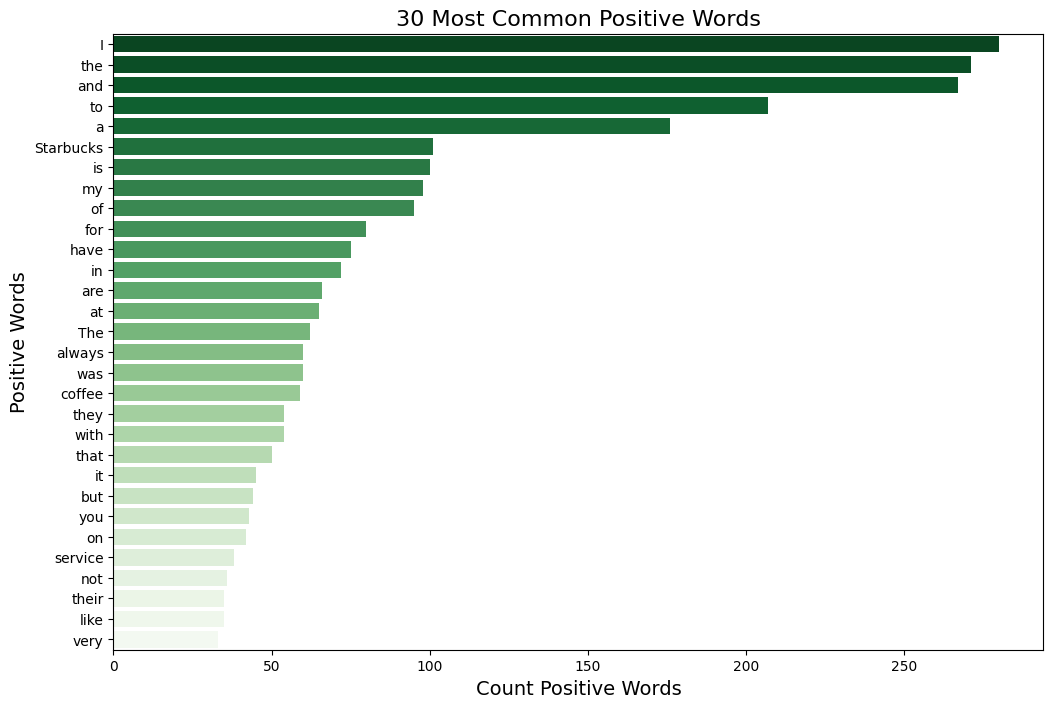

In [54]:
from collections import Counter

# Process text and count words
positive_text = df[df["label"] == "Positive"]
data_set = positive_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)

# Create DataFrame
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot with reversed green palette
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words, palette="Greens_r")
plt.title('30 Most Common Positive Words', fontsize=16)
plt.xlabel('Count Positive Words', fontsize=14)
plt.ylabel('Positive Words', fontsize=14)
plt.show()


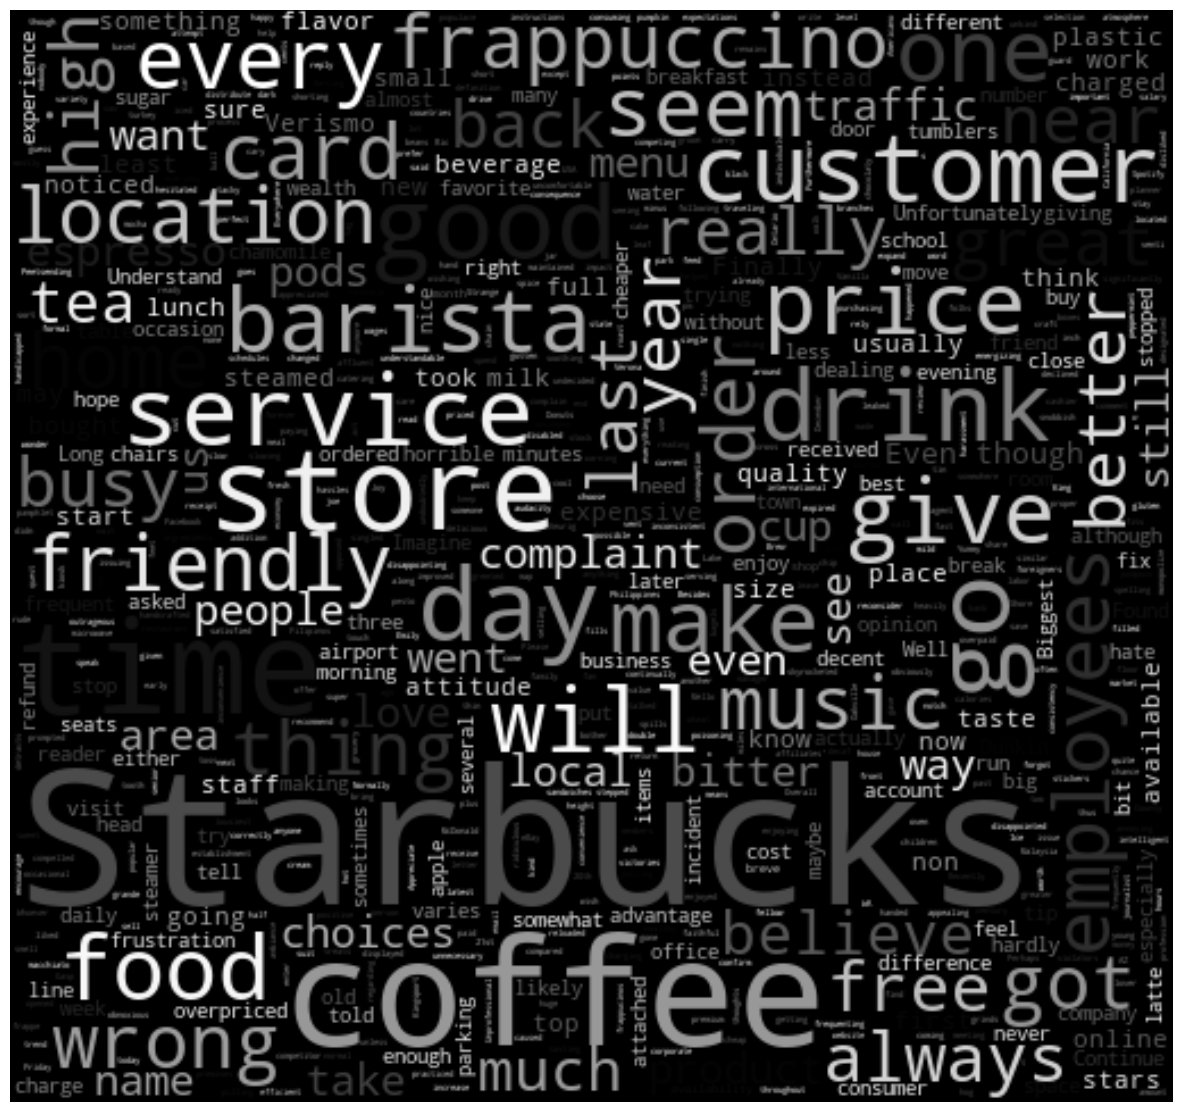

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Generate the neutral text
neutral_wordcloud = df[df["label"] == "Neutral"]
neutral_text = " ".join(neutral_wordcloud['text'].values.tolist())

# Generate the word cloud with a grey palette
wordcloud = WordCloud(
    width=800, 
    height=800, 
    stopwords=STOPWORDS, 
    background_color='black', 
    max_words=800, 
    colormap="Greys",  # Use the Greys colormap for grey tones
    mask=mask  # Ensure mask is correctly loaded
).generate(neutral_text)

# Plot the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


30 Most Common Words From Neutral Text

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_47405/1923271888.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_common_words, palette="Greys_r")


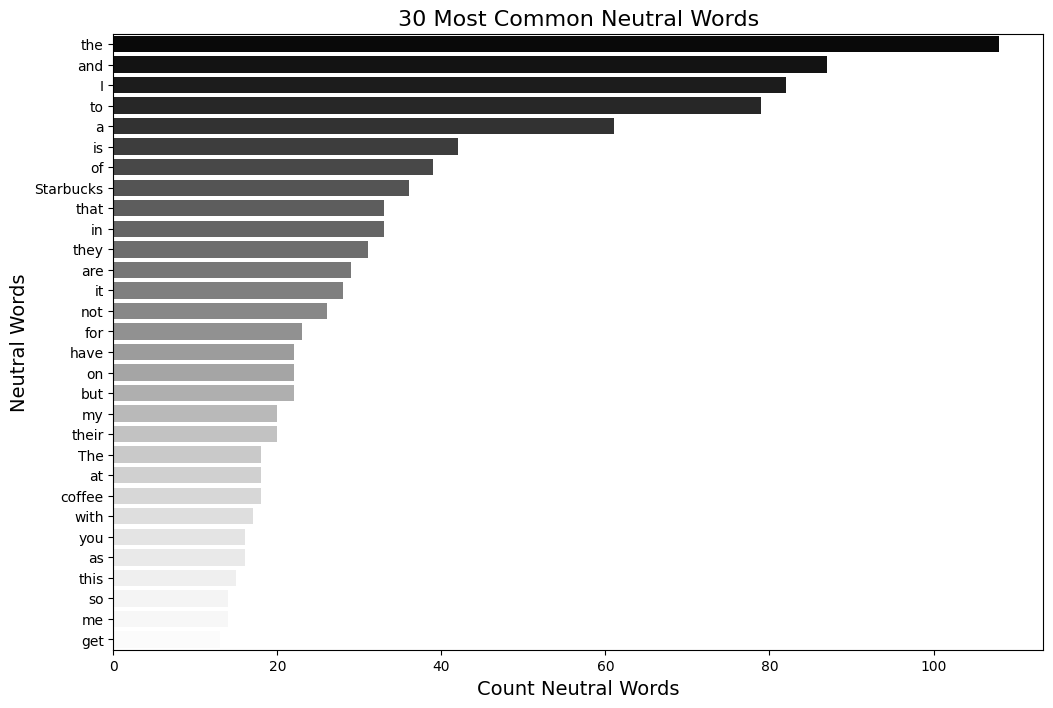

In [58]:
from collections import Counter

# Process text and count words
neutral_text = df[df["label"] == "Neutral"]
data_set = neutral_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)

# Create DataFrame
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot with reversed grey palette
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words, palette="Greys_r")
plt.title('30 Most Common Neutral Words', fontsize=16)
plt.xlabel('Count Neutral Words', fontsize=14)
plt.ylabel('Neutral Words', fontsize=14)
plt.show()


In [59]:
df["text_length"]=df["text"].apply(len)

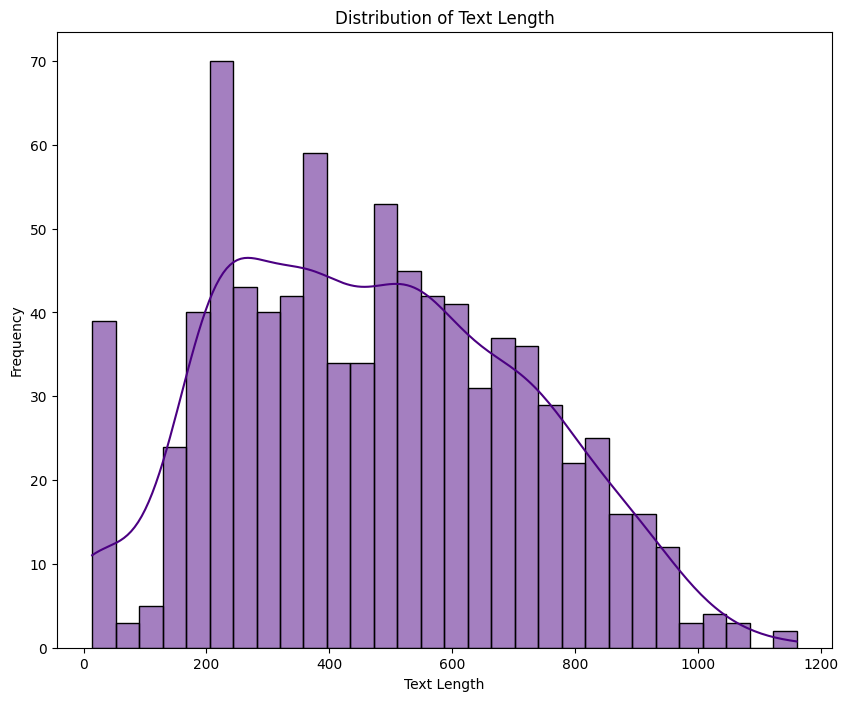

In [62]:
plt.figure(figsize=(10,8))
sns.histplot(df["text_length"], bins=30, kde=True,color="indigo")
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [63]:
avg_len=df["text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 471.06


In [64]:
df.drop(columns=["text_length"],axis=1,inplace=True)

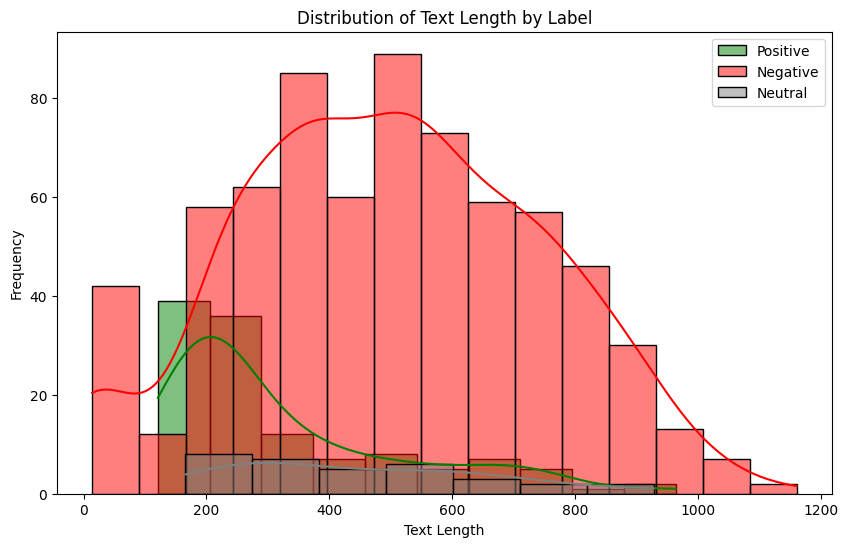

In [67]:

df_positive=df[df["label"]=="Positive"]["text"].str.len()
df_negative=df[df["label"]=="Negative"]["text"].str.len()
df_neutral=df[df["label"]=="Neutral"]["text"].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df_positive, color='green', alpha=0.5, label='Positive', kde=True)
sns.histplot(df_negative, color='red', alpha=0.5, label='Negative', kde=True)
sns.histplot(df_neutral, color='grey', alpha=0.5, label='Neutral', kde=True)

plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [68]:
df["label"].replace({"Positive": 0, "Negative": 1, "Neutral": 2}, inplace=True)

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_47405/2906183848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label"].replace({"Positive": 0, "Negative": 1, "Neutral": 2}, inplace=True)
/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_47405/2906183848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [70]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
max_len=400
sample_text=df["text"].iloc[0]
tokenize_data= tokenizer(sample_text, return_tensors='pt', padding=True, truncation=True, max_length=max_len)
print("=======================================================================================================")
print("\n")
print(f"Orginal Text : {sample_text}")
print("\n")
print("=======================================================================================================")
print("=======================================================================================================")
print("=======================================================================================================")
print("\n")
print(f"Encoded Text : {tokenize_data}")

ModuleNotFoundError: No module named 'transformers'